<a href="https://colab.research.google.com/github/RayedShamim/Default-of-Credit-Card-Clients-Classification-Project/blob/main/Default_of_Credit_Card_Clients_Classification_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Default of Credit Card Clients Classification Capstone Project
### by Rayed Shamim Syed Mohammed



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [70]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date
import warnings

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### Dataset Loading

In [3]:
# Load Dataset
df = pd.read_csv('https://raw.githubusercontent.com/RayedShamim/Default-of-Credit-Card-Clients-Classification-Project/main/default%20of%20credit%20card%20clients.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [5]:
# Correcting Column Names
df1 = df.copy()
df1.columns = [ele for ele in list(df.loc[0,:])]
df1.drop(0,inplace=True)
df1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
df1.drop
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
df1.shape

(30000, 25)

### Dataset Information

In [8]:
# Dataset Info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
len(df1[df1.duplicated()])

0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df1.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

<Axes: >

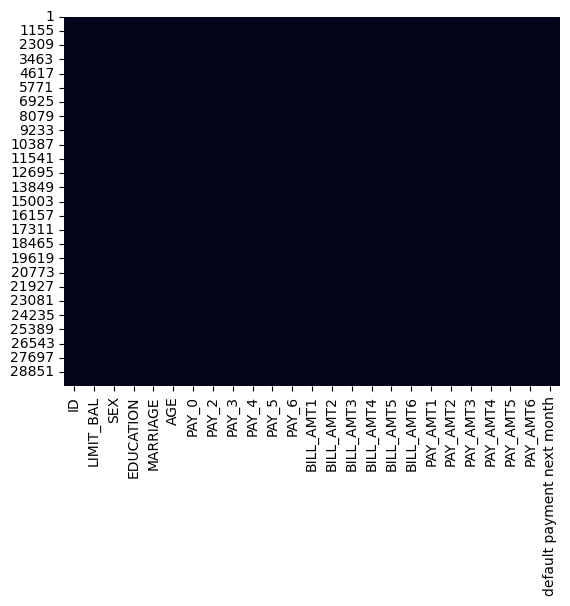

In [11]:
# Visualizing the missing values
sns.heatmap(df1.isnull(),cbar=False)

### What did you know about your dataset?

There are 30,000 rows and 25 columns in the dataset. There are no missing or null values in the dataset. Also there are no duplicate values present.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [13]:
# Dataset Describe
# converting object/STRING --> INT
df2 = df1.astype(np.int64)

df2.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Variables Description

##Credit Card Client
* ID: Customer ID
* LIMIT_BAL: Credit Limit
* SEX: Male/Female
* EDUCATION: Level of Education
* MARRIAGE: Married/Un-married
* AGE: Age of the client
* [PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6]: Client Payment History
* [BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6]: Bill Amount History
* [PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6]: Payment Amount History

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
for col in df2.columns:
  print(f'The number of unique values in the column {col} is {df2[col].nunique()}')

The number of unique values in the column ID is 30000
The number of unique values in the column LIMIT_BAL is 81
The number of unique values in the column SEX is 2
The number of unique values in the column EDUCATION is 7
The number of unique values in the column MARRIAGE is 4
The number of unique values in the column AGE is 56
The number of unique values in the column PAY_0 is 11
The number of unique values in the column PAY_2 is 11
The number of unique values in the column PAY_3 is 11
The number of unique values in the column PAY_4 is 11
The number of unique values in the column PAY_5 is 10
The number of unique values in the column PAY_6 is 10
The number of unique values in the column BILL_AMT1 is 22723
The number of unique values in the column BILL_AMT2 is 22346
The number of unique values in the column BILL_AMT3 is 22026
The number of unique values in the column BILL_AMT4 is 21548
The number of unique values in the column BILL_AMT5 is 21010
The number of unique values in the column B

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
df_def = df2[df2['default payment next month'] == 1]

# Finding which clients default in Credit Limit Category
limit_bal_def = df_def.groupby('LIMIT_BAL').agg({'default payment next month':'count'}).sort_values(by='default payment next month',ascending=False).head(10)
limit_bal_def

,default payment next month
LIMIT_BAL,
50000,885
20000,698
30000,568
80000,363
100000,272
200000,270
60000,233
70000,210
10000,197


In [16]:
# Number of clients that are defaulting genderwise

gender_def = df_def.groupby('SEX').agg({'default payment next month':'count'}).sort_values(by='default payment next month',ascending=False).head(10)
gender_def

,default payment next month
SEX,
2,3763
1,2873


In [17]:
# Number of clients that are defaulting education wise
education_def = df_def.groupby('EDUCATION').agg({'default payment next month':'count'}).sort_values(by='default payment next month',ascending=False).head(10)
education_def

,default payment next month
EDUCATION,
2,3330
1,2036
3,1237
5,18
6,8
4,7


In [18]:
# Number of clients that are defaulting marriage wise
marriage_def = df_def.groupby('MARRIAGE').agg({'default payment next month':'count'}).sort_values(by='default payment next month',ascending=False).head(10)
marriage_def

,default payment next month
MARRIAGE,
2,3341
1,3206
3,84
0,5


In [19]:
# number of clients that are defaulting age wise
age_def = df_def.groupby('AGE',as_index=False).agg({'default payment next month':'count'}).sort_values(by='default payment next month',ascending=False).head(30)
age_def

,AGE,default payment next month
6,27,313
8,29,313
4,25,302
3,24,300
7,28,286
9,30,274
15,36,254
5,26,253
2,23,247
13,34,231


### What all manipulations have you done and insights you found?

The original dataset contained two rows of column names. The first row had only written X1, X2, X3... and Y, wereas the second column had meaning labels for columns. Therefore the second row of columns were converted into actual column labels replacing X1, X2, X3 and so on.

From my analysis, I came to that clients which had a credit limit of 50,000 defaulted followed by 20,000 and 30,000. Also clients with gender class 2 defaulted the most in comparison to gender class 1. And clients that belonged to education class 2 defaulted the most followed education class 1 and 3. And clients that belonged to marriage class 2 defaulted the most followed marriage class 1. And finally, clients that belonged to age group 27 to 29 defaulted the most.

So in conclusion we can say that if a particular client has a credit limit of 50,000, is of the gender class 2, has a education of class 2, and belongs to marriage class 2, and belongs to age group 27 to 29, this client has a very high chance to default.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Credit Card limit default Frequency (Univariate)

Text(0.5, 1.0, 'Credit limit vs defaults')

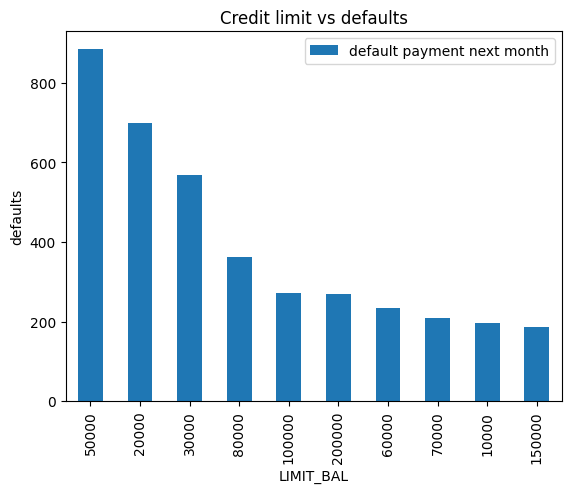

In [20]:
# Chart - 1 visualization code
limit_bal_def.plot(kind='bar')
plt.ylabel('defaults')
plt.title('Credit limit vs defaults')

##### 1. Why did you pick the specific chart?

A bar chart is used to show frequency or percentages of variables in a dataset. Hence this chart was used to show the frequency of defaults in different credit limit categories.

##### 2. What is/are the insight(s) found from the chart?

As we can see from the above graph that clients with credit limit of 50,000 has the highest frequency of defaults.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

A business can learn that if a client applies for a credit card of limit 50,000 the probability of default is higher.

#### Chart - 2 Client Gender Class wise default (Bi-variate analysis)

Text(0.5, 1.0, 'Client default ratio gender wise')

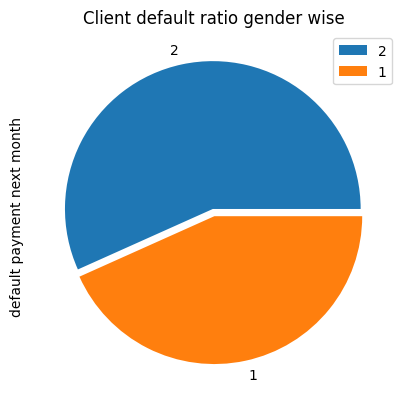

In [21]:
# Chart - 2 Analysing the number of defaults gender wise
gender_def.plot(kind='pie',subplots=True,explode=[0.05,0])
plt.title('Client default ratio gender wise')

##### 1. Why did you pick the specific chart?

A pie chart is used to show part-in-total values of the dataset. Here we use this chart to show the total number of defaults of clients gender wise.

##### 2. What is/are the insight(s) found from the chart?

Here we see that clients with gender class 2 had higher portion of defaults than gender class 1.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

A credit card business can learn that if individual is applying for a credit card and belongs to gender class 2, then the chance of default is somewhat higher.

#### Chart - 3 Client defaults by level of education (Univariate)

Text(0.5, 1.0, 'Education Level vs number of defaults')

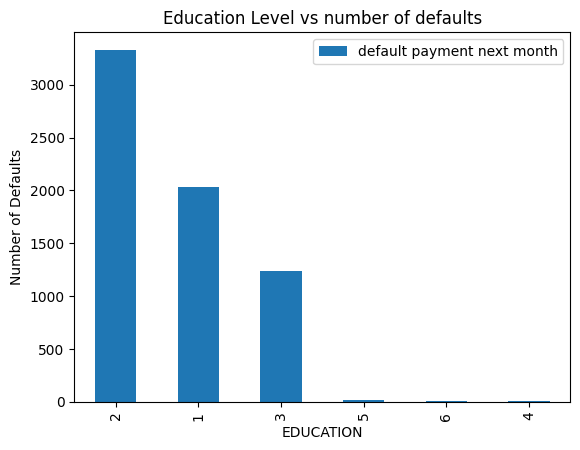

In [22]:
# Chart - 3 visualization code
education_def.plot(kind='bar')
plt.ylabel('Number of Defaults')
plt.title('Education Level vs number of defaults')

##### 1. Why did you pick the specific chart?

A bar chart is used to show frequency or percentages of variables in a dataset. Hence this chart was used to show the frequency of defaults in different education levels of clients.

##### 2. What is/are the insight(s) found from the chart?

As we can see that a large number of datapoint present in class 2, 1 and 3. This expains that people with less education tend to default.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From a business prespective, one can learn that if a client is applying for a credit card, then they should have atleast a minimum qualification of class 3 or higher.

#### Chart -  Client defaults marriage status wise

Text(0.5, 1.0, 'Marriage status vs default')

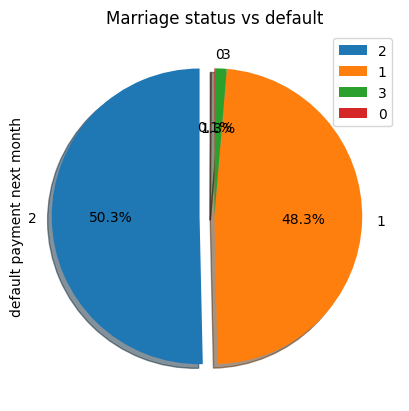

In [23]:
# Chart - 4 visualization code
explode=[0.1,0,0,0]
marriage_def.plot(kind='pie',
                  subplots=True,
                  autopct='%1.1f%%',
                  explode=explode,
                  shadow=True,startangle=90)
plt.title('Marriage status vs default')

##### 1. Why did you pick the specific chart?

A pie chart is used to show part-in-total values of the dataset. Here we use this chart to show the total ratio of defaults of clients marriage wise.

##### 2. What is/are the insight(s) found from the chart?

As we can see that clients with marriage status 1 and 2 are defaulting the most.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From a business perspective, one can learn that if a client is applying for a credit card and has a marriage status of 2 or 1, then the chance of default is very high.

#### Chart - 5 Age distribution of clients that defaulted (Bi-variate)

Text(0.5, 0, 'Age group of clients')

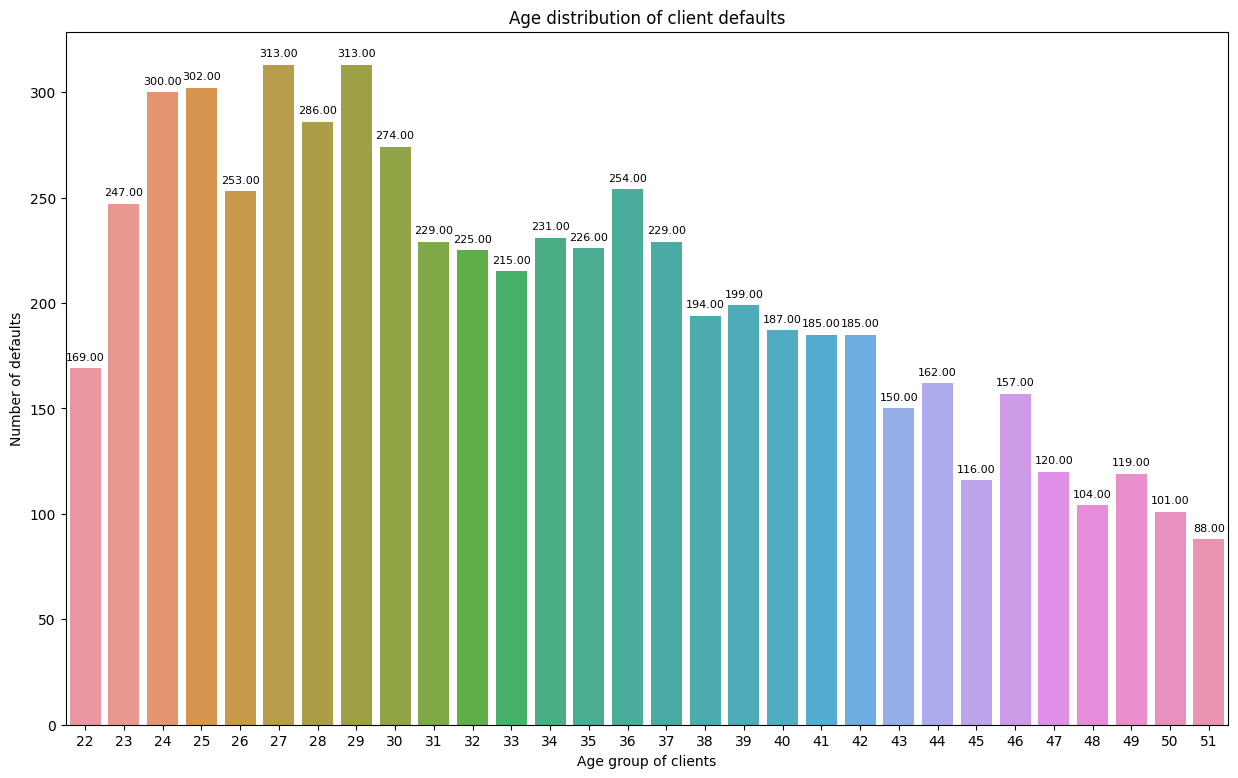

In [24]:
# Chart - 5 visualization code
fig = plt.figure(figsize=(15,9))
ax = fig.gca()
x = age_def['AGE']
y = age_def['default payment next month']
plots = sns.barplot(x=x,y=y)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 8),
                   textcoords='offset points')
ax.set_title('Age distribution of client defaults')
ax.set_ylabel('Number of defaults')
ax.set_xlabel('Age group of clients')


##### 1. Why did you pick the specific chart?

A bar chart is used to show frequency or percentages of variables in a dataset. Hence this chart was used to show the frequency of defaults in different education levels of clients.

##### 2. What is/are the insight(s) found from the chart?

As we can see that people of younger age group are defaulting more than people of older age group. The peak especially at age 27 and 29.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From a business perspective, one can learn that if a client is trying to apply for a credit card and belongs to age group 20s, then the probability of default is high.

#### Chart - 14 - Correlation Heatmap

<Axes: >

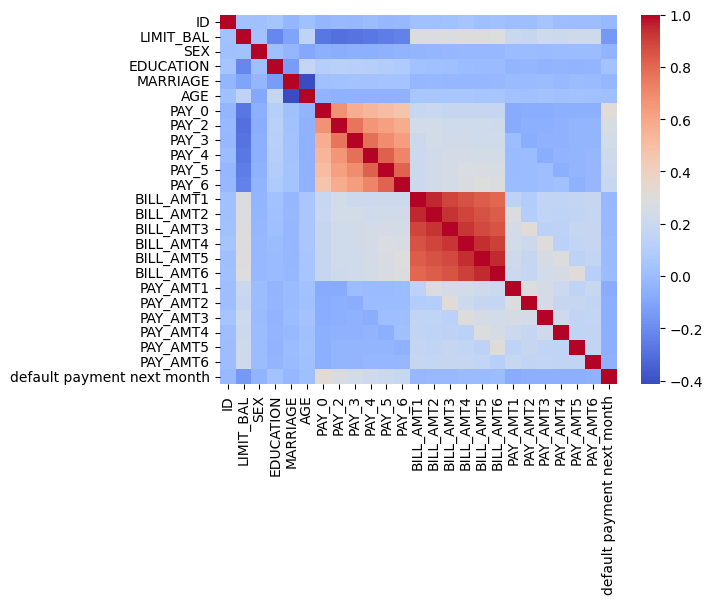

In [25]:
# Correlation Heatmap visualization code
sns.heatmap(df2.corr(),cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Correlation heatmap are generally used to visualize corelation/dependency of one variable with the other.

Therefore here we can see that correlation between variables such as Id, credit limit, gender, education, marriage, age, payment history, bill amount history and payment amount history.

##### 2. What is/are the insight(s) found from the chart?

The only strong correlation that can be seen here are bill amount histories and payment histories.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [26]:
# Handling Missing Values & Missing Value Imputation
df2.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

As we can see, there are no missing values in the dataset.

### 2. Handling Outliers

In [57]:
# Handling Outliers & Outlier treatments
# Checking for outliers
df2.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


<Axes: >

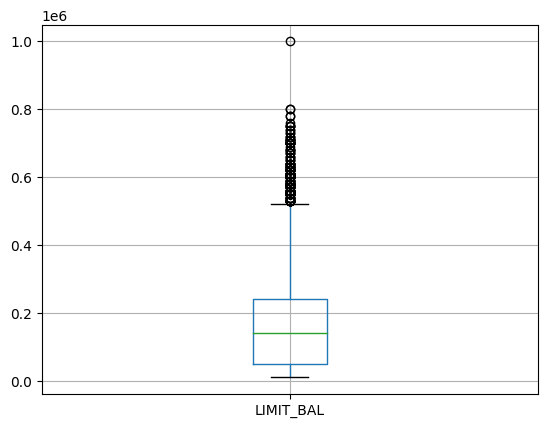

In [60]:
df2.boxplot(column='LIMIT_BAL')

In [61]:
df2[df2['LIMIT_BAL'] == 1000000]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2198,2198,1000000,2,1,1,47,0,0,0,-1,...,891586,927171,961664,50784,50723,896040,50000,50000,50256,0


In [63]:
# Removing rows that have credit limit of 1,000,000
df3 = df2[df2['LIMIT_BAL'] != 1000000]

##### What all outlier treatment techniques have you used and why did you use those techniques?

The outlier removal technique used was boolean indexing in which the undesired rows were removed based on applying a condition. In this case the condition was that any row that had one million as the credit limit was removed.

Because this value was very distant from the rest of the population and can cause abnormal results.

### 3. Categorical Encoding

In [64]:
# Checking if encoding is necessary
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29999 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          29999 non-null  int64
 1   LIMIT_BAL                   29999 non-null  int64
 2   SEX                         29999 non-null  int64
 3   EDUCATION                   29999 non-null  int64
 4   MARRIAGE                    29999 non-null  int64
 5   AGE                         29999 non-null  int64
 6   PAY_0                       29999 non-null  int64
 7   PAY_2                       29999 non-null  int64
 8   PAY_3                       29999 non-null  int64
 9   PAY_4                       29999 non-null  int64
 10  PAY_5                       29999 non-null  int64
 11  PAY_6                       29999 non-null  int64
 12  BILL_AMT1                   29999 non-null  int64
 13  BILL_AMT2                   29999 non-null  int64
 14  BILL_A

#### What all categorical encoding techniques have you used & why did you use those techniques?

There is no need for categorical encoding, because we can see that all the columns are already encoded in numerical format.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [66]:
# Manipulate Features to minimize feature correlation and create new features

# Removing Client ID column
df4 = df3.drop(columns='ID',axis=1)
df4

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


#### 2. Feature Selection

In [68]:
# Select your features wisely to avoid overfitting
def calculate_vif(data):

  cols = data.columns
  vif_values = [variance_inflation_factor(data.values, ele) for ele in np.arange(data.shape[1])]

  vif = pd.DataFrame({'Columns': cols,'vif': vif_values})

  return vif

In [71]:
# Checking for multicolinearity
calculate_vif(df4)

,Columns,vif
0,LIMIT_BAL,4.035383
1,SEX,9.104424
2,EDUCATION,6.731376
3,MARRIAGE,6.287798
4,AGE,11.051532
5,PAY_0,1.996616
6,PAY_2,3.215477
7,PAY_3,3.728986
8,PAY_4,4.445158
9,PAY_5,4.988587


In [75]:
calculate_vif(df4[[col for col in df4.columns if col not in ['BILL_AMT2','BILL_AMT5','BILL_AMT3','BILL_AMT4']]])

,Columns,vif
0,LIMIT_BAL,4.020904
1,SEX,9.101261
2,EDUCATION,6.729714
3,MARRIAGE,6.285962
4,AGE,11.051238
5,PAY_0,1.996116
6,PAY_2,3.210539
7,PAY_3,3.706355
8,PAY_4,4.430295
9,PAY_5,4.968797


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [42]:
# Transform Your data


### 6. Data Scaling

In [43]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [44]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [45]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [46]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [47]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [48]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [49]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [50]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [51]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [52]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [53]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [54]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [55]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [56]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***